In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal
import scipy
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 16})
import cartopy.crs as ccrs


In [2]:
def monthly_to_annual(array):
    """ calculate annual mena from monthly data, using unequal month lengths fros noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

def savgol_filter(array, window, order=2):
    smooth_array = array.copy()
    smooth_array[:] = scipy.signal.savgol_filter(array, window, order)
    return(smooth_array)

In [3]:
conv_fact_ppm_to_pg = 2.12 # Pg C / ppm

areacella = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
areacello = xr.open_dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

sftlf = xr.open_dataset('sftlf_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftgif = xr.open_dataset('sftgif_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftgif' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
datadir_nxco2 = '/Users/CDKoven/datasets/abrupt_NxCO2/'

tas_2xco2 = xr.open_mfdataset(datadir_nxco2 + 'tas_Amon_CESM2_abrupt-2xCO2_r1i1p1f1_gn_*.nc')
nbp_2xco2 = xr.open_mfdataset(datadir_nxco2 + 'nbp_Lmon_CESM2_abrupt-2xCO2_r1i1p1f1_gn_*.nc')
fgco2_2xco2 = xr.open_mfdataset(datadir_nxco2 + 'fgco2_Omon_CESM2_abrupt-2xCO2_r1i1p1f1_gn_*.nc')

tas_4xco2 = xr.open_mfdataset(datadir_nxco2 + 'tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_*.nc')
nbp_4xco2 = xr.open_mfdataset(datadir_nxco2 + 'nbp_Lmon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_*.nc')
fgco2_4xco2 = xr.open_mfdataset(datadir_nxco2 + 'fgco2_Omon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_*.nc')


cvegmask = xr.open_dataset(datadir_nxco2 + 'cVeg_Lmon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc')['cVeg'].mean(dim='time') != 0.

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'nbp' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'fgco2' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: var

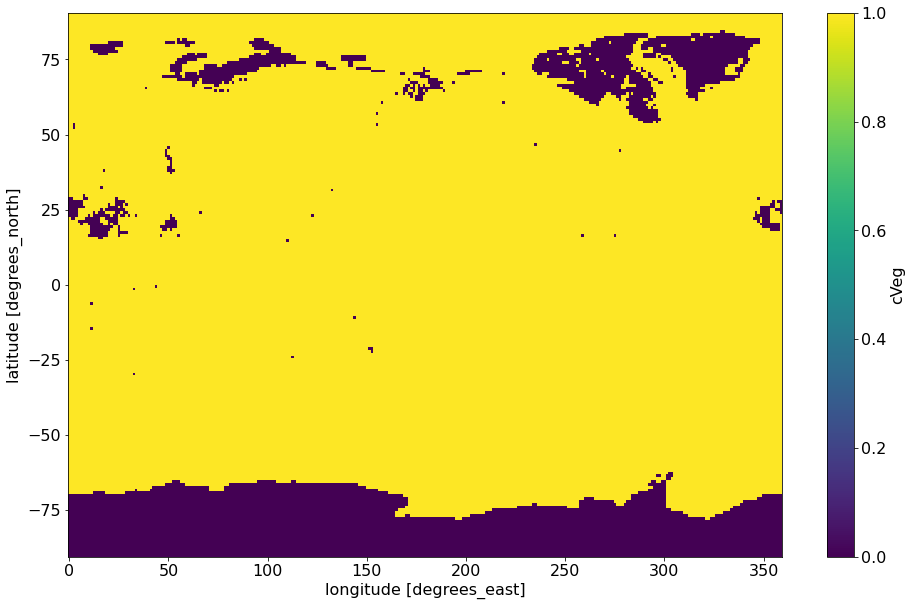

In [5]:
cvegmask.plot()

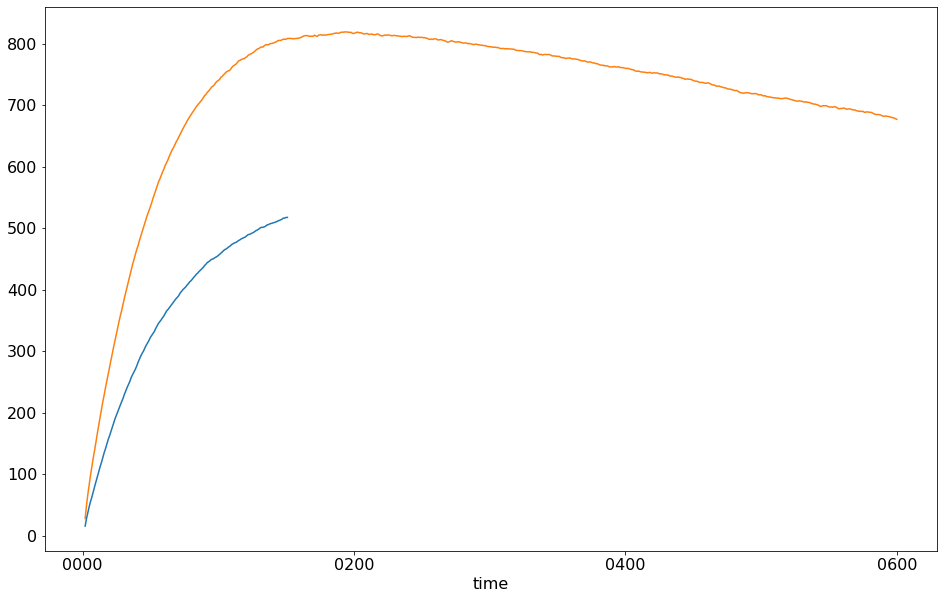

In [6]:
nbp_global_2xco2 = monthly_to_annual((nbp_2xco2['nbp'] * cvegmask.data * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon')) * 86400. * 365. * 1e-12)

nbp_global_2xco2.cumsum().plot()

nbp_global_4xco2 = monthly_to_annual((nbp_4xco2['nbp'] * cvegmask.data * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon')) * 86400. * 365. * 1e-12)

nbp_global_4xco2.cumsum().plot()


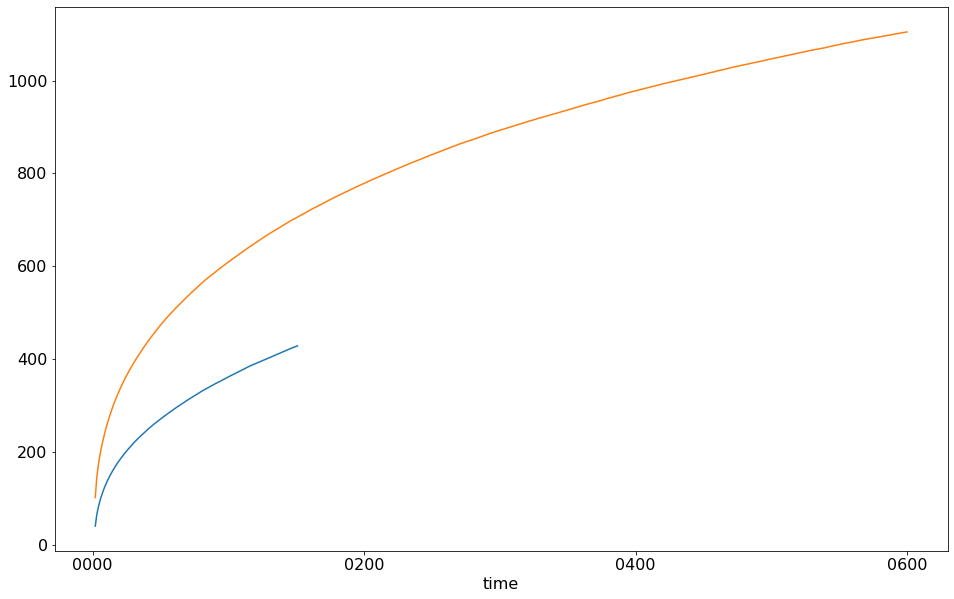

In [7]:
fgco2_global_2xco2 = monthly_to_annual((fgco2_2xco2['fgco2'] * areacello['areacello'].data * 86400. * 365. * 1e-12).sum(dim=('nlat', 'nlon')))

fgco2_global_2xco2.cumsum().plot()

fgco2_global_4xco2 = monthly_to_annual((fgco2_4xco2['fgco2'] * areacello['areacello'].data * 86400. * 365. * 1e-12).sum(dim=('nlat', 'nlon')))

fgco2_global_4xco2.cumsum().plot()

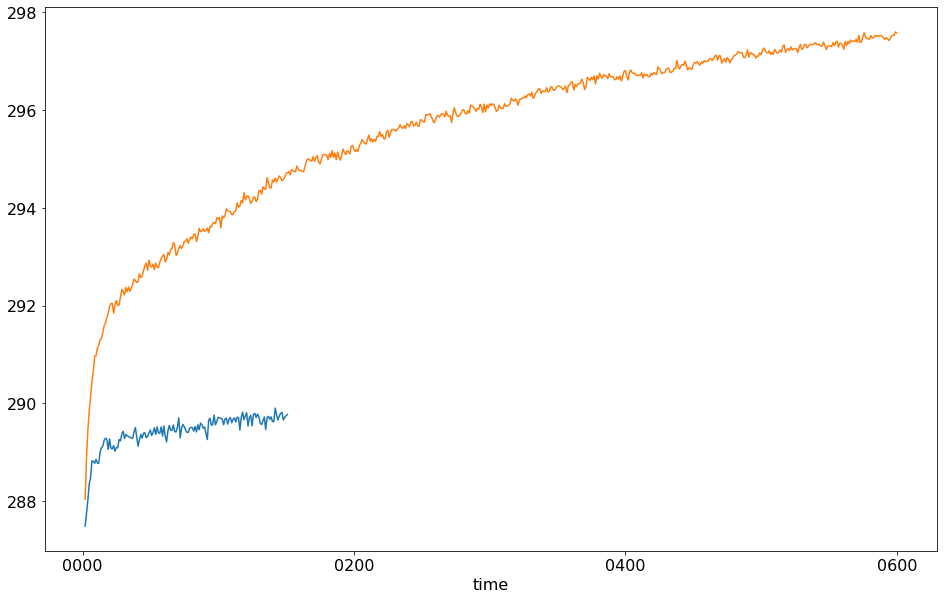

In [8]:
tas_global_2xco2 =  monthly_to_annual((tas_2xco2['tas'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon')))

tas_global_2xco2.plot()

tas_global_4xco2 =  monthly_to_annual((tas_4xco2['tas'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon')))

tas_global_4xco2.plot()


In [9]:
cesm2_co2_1850 = 284.7  ## CESM used the CMIP5 rather than the CMIP6 value

atm_sink_2xco2 = cesm2_co2_1850 * conv_fact_ppm_to_pg
atm_sink_4xco2 = 3. * cesm2_co2_1850 * conv_fact_ppm_to_pg

cum_emissions_2xco2 = atm_sink_2xco2 + fgco2_global_2xco2.cumsum() + nbp_global_2xco2.cumsum()
cum_emissions_4xco2 = atm_sink_4xco2 + fgco2_global_4xco2.cumsum() + nbp_global_4xco2.cumsum()


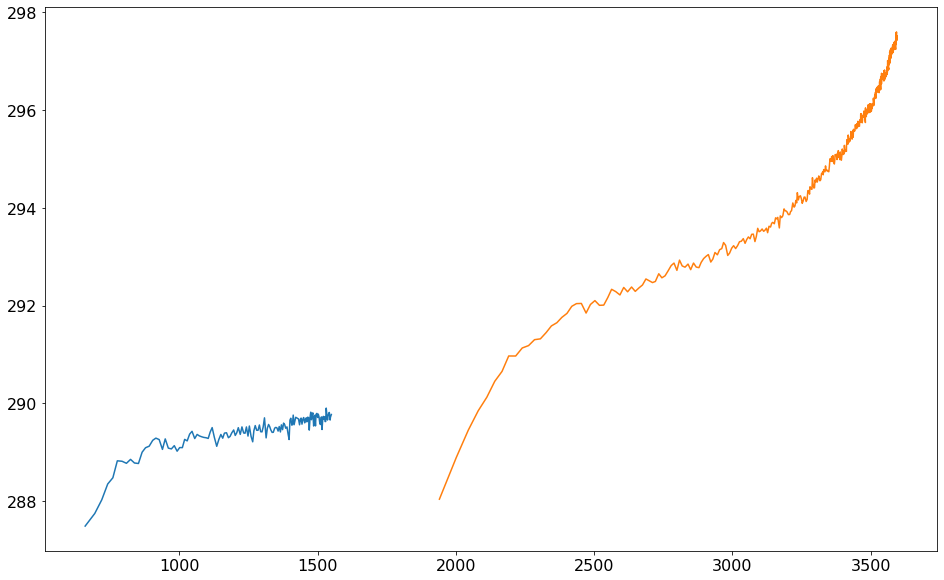

In [10]:
plt.plot(cum_emissions_2xco2, tas_global_2xco2)

plt.plot(cum_emissions_4xco2, tas_global_4xco2)

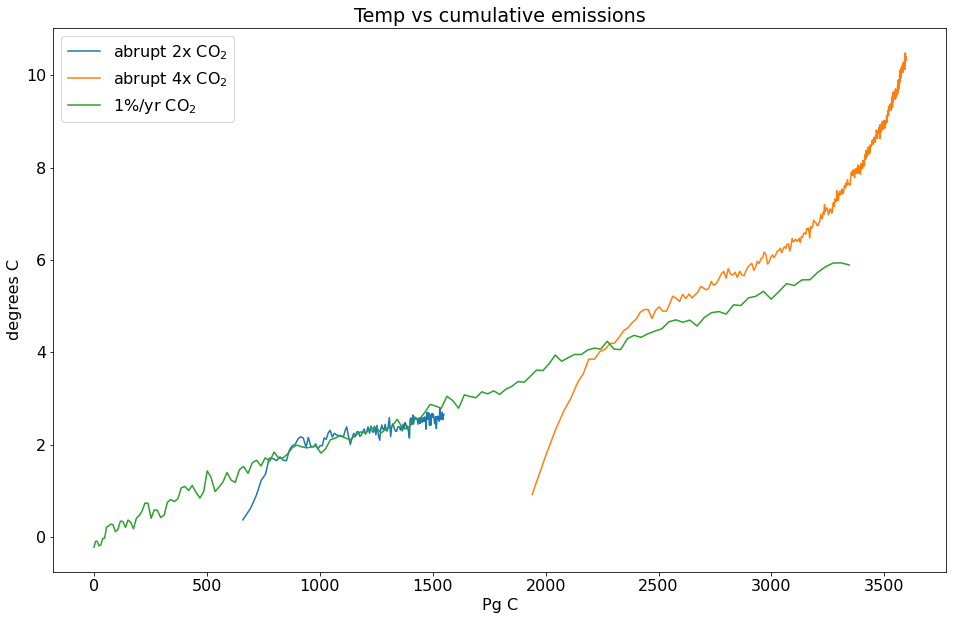

In [11]:
## open 1pctco2 csv files
co2_1pctco2 = np.loadtxt('co2_cesm2_1pctco2_0001_0150.csv', delimiter=',')[:,1]
tas_1pctco2 = np.loadtxt('tas_cesm2_1pctco2_0001_0150.csv', delimiter=',')[:,1]
fgco2_1pctco2 = np.loadtxt('fgco2_cesm2_1pctco2_0001_0150.csv', delimiter=',')[:,1]
nbp_1pctco2 = np.loadtxt('nbp_cesm2_1pctco2_0001_0150.csv', delimiter=',')[:,1]
atm_sink_cum = (co2_1pctco2  - co2_1pctco2[0]) * conv_fact_ppm_to_pg

cum_emissions_1pctco2 = atm_sink_cum + fgco2_1pctco2.cumsum() + nbp_1pctco2.cumsum()

tas_mean_ctrl = 287.11593294  ## from the flat10_ctrl experiment

plt.plot(cum_emissions_2xco2, tas_global_2xco2 - tas_mean_ctrl)
plt.plot(cum_emissions_4xco2, tas_global_4xco2 - tas_mean_ctrl)
plt.plot(cum_emissions_1pctco2, tas_1pctco2 - tas_mean_ctrl)

plt.title('Temp vs cumulative emissions')
plt.ylabel('degrees C')
plt.xlabel('Pg C')
plt.legend(['abrupt 2x CO$_2$','abrupt 4x CO$_2$','1%/yr CO$_2$'])

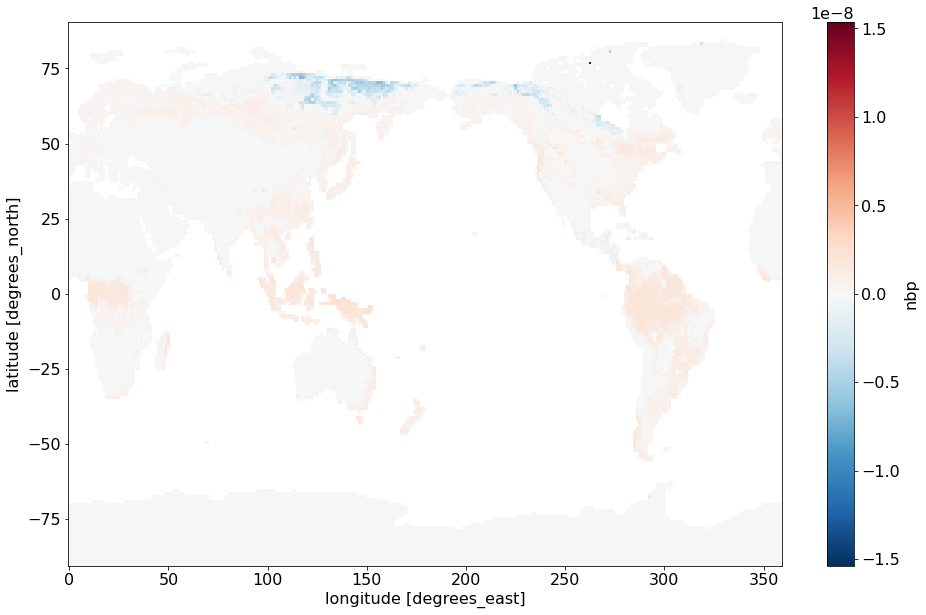

In [12]:
(nbp_4xco2['nbp']* cvegmask.data).mean(dim='time').plot()

In [13]:
np.savetxt('cum_emissions_2xco2.csv', cum_emissions_2xco2)
np.savetxt('tas_global_2xco2.csv', tas_global_2xco2)

np.savetxt('cum_emissions_4xco2.csv', cum_emissions_4xco2)
np.savetxt('tas_global_4xco2.csv', tas_global_4xco2)

In [14]:
## make a map of the temperature difference centered at a specific level of cumulative emissions

cum_emiss_map_amount = 2750 # Pg C

ind_4xco2_map = np.argmin(np.abs(cum_emissions_4xco2.data - cum_emiss_map_amount)).compute()
print(ind_4xco2_map)

ind_1pctco2_map = np.argmin(np.abs(cum_emissions_1pctco2 - cum_emiss_map_amount))
print(ind_1pctco2_map)



41
131


In [15]:
buffer_time = 5 # +/- years to average

tas_1pctco2_spatial = xr.open_mfdataset('tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_*.nc')

tas_1pctco2_annual = monthly_to_annual(tas_1pctco2_spatial['tas'])
tas_1pctco2_annual['time'] = np.arange(len(tas_1pctco2_annual['time']))
tas_1pctco2_spatial_at_cum_emiss = tas_1pctco2_annual.isel(time=slice(ind_1pctco2_map-buffer_time,ind_1pctco2_map+buffer_time)).mean(dim='time')

tas_4xco2_annual = monthly_to_annual(tas_4xco2['tas'])
tas_4xco2_annual['time'] = np.arange(len(tas_4xco2_annual['time']))
tas_4xco2_spatial_at_cum_emiss = tas_4xco2_annual.isel(time=slice(ind_4xco2_map-buffer_time,ind_4xco2_map+buffer_time)).mean(dim='time')




/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Text(0.5, 1.0, 'Temp difference at 2750 Pg CE: 4xCO2 - 1pctCO2')

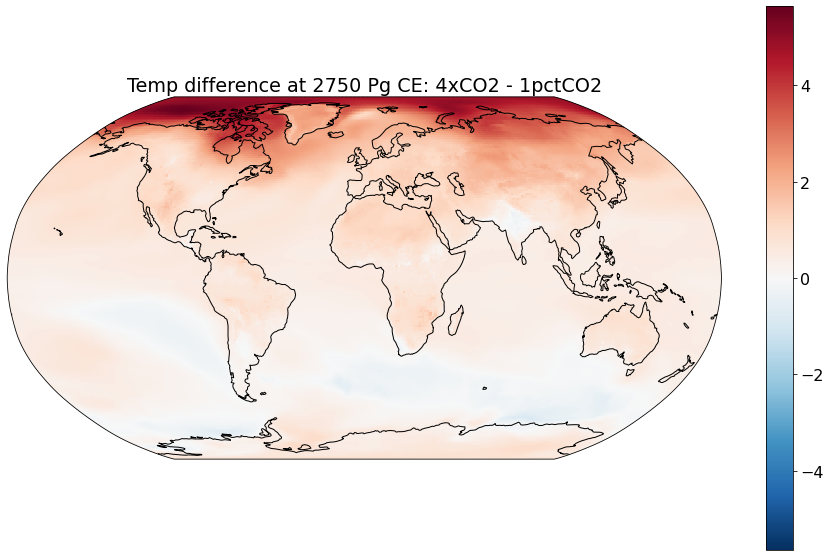

In [16]:
ax = plt.subplot(projection=ccrs.Robinson())

(tas_4xco2_spatial_at_cum_emiss - tas_1pctco2_spatial_at_cum_emiss).plot(transform=ccrs.PlateCarree())

ax.coastlines()

plt.title('Temp difference at 2750 Pg CE: 4xCO2 - 1pctCO2')
